In [1]:
from sklearn import metrics, pipeline, preprocessing

import numpy as np
import pandas as pd

In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
raw_train_data = pd.read_csv('train.csv')

In [55]:
raw_train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [56]:
raw_train_data.shape

(10886, 12)

In [57]:
raw_train_data.isnull().values.any()

False

In [58]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [59]:
raw_train_data.datetime = raw_train_data.datetime.apply(pd.to_datetime)
raw_train_data['month'] = raw_train_data.datetime.apply(lambda x: x.month)
raw_train_data['hour'] = raw_train_data.datetime.apply(lambda x: x.hour)

In [60]:
train_data = raw_train_data.iloc[:-1000, :]
test_data = raw_train_data.iloc[-1000:, :]

In [61]:
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

test_labels = test_data['count'].values
test_data = test_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

In [62]:
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype=bool)

categorical_data_columns = ['season', 'weather', 'month']
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype=bool)

numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'hour']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype=bool)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
regressor = RandomForestRegressor(random_state=0, max_depth=20, n_estimators=50)

In [65]:
estimator = pipeline.Pipeline(steps=[
        ('feature_processing', pipeline.FeatureUnion(transformer_list=[
                    # binary
                    ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])),
                    
                    # numeric
                    ('numeric_variables_preprocessing', pipeline.Pipeline(steps=[
                                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                                ('scaling', preprocessing.StandardScaler(with_mean=0.0, with_std=1.0))
                            ])),
                    
                    # categorical
                    ('categorical_variables_preprocessing', pipeline.Pipeline(steps=[
                                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown='ignore'))
                            ])),
                ])),
        ('model_fitting', regressor)
    ])

In [67]:
estimator.fit(train_data, train_labels)

Pipeline(steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x0000003E481BE598>, pass_y=False,
          validate=True)), ('numeric_variables_preprocessing', Pipeline(steps..._estimators=50, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False))])

In [68]:
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

79.465803762612722

In [70]:
test_labels[:10]

array([525, 835, 355, 222, 228, 325, 328, 308, 346, 446], dtype=int64)

In [71]:
estimator.predict(test_data)[:10]

array([ 409.565     ,  505.56      ,  256.14066667,  165.5502619 ,
        206.48474784,  265.73960439,  254.49615818,  317.85774486,
        282.66963263,  441.59333333])

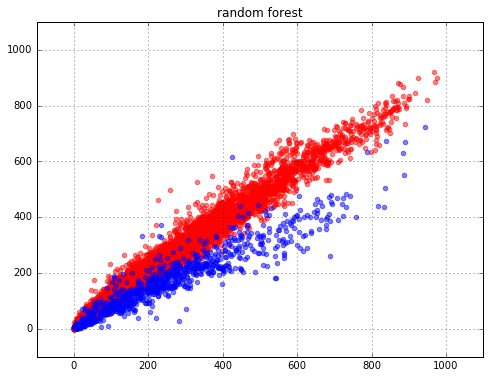

In [73]:
pylab.figure(figsize=(8, 6))

pylab.grid(True)
pylab.xlim(-100, 1100)
pylab.ylim(-100, 1100)
pylab.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color='red')
pylab.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color='blue')
pylab.title('random forest')

# make submission

In [74]:
raw_test_data = pd.read_csv('test.csv')

In [75]:
raw_test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [76]:
raw_test_data.isnull().values.any()

False

In [77]:
raw_test_data.datetime = raw_test_data.datetime.apply(pd.to_datetime)
raw_test_data['month'] = raw_test_data.datetime.apply(lambda x: x.month)
raw_test_data['hour'] = raw_test_data.datetime.apply(lambda x: x.hour)

In [78]:
test_data = raw_test_data.drop(['datetime'], axis = 1)

In [79]:
submission = pd.DataFrame()
submission['datetime'] = raw_test_data['datetime']
submission['count'] = estimator.predict(test_data)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,14.06
1,2011-01-20 01:00:00,5.66
2,2011-01-20 02:00:00,4.46
3,2011-01-20 03:00:00,3.72
4,2011-01-20 04:00:00,2.88


In [80]:
submission.to_csv('submission.csv', index=False)